Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     22986
           1       0.77      0.72      0.74      5154

    accuracy                           0.91     28140
   macro avg       0.85      0.84      0.84     28140
weighted avg       0.91      0.91      0.91     28140



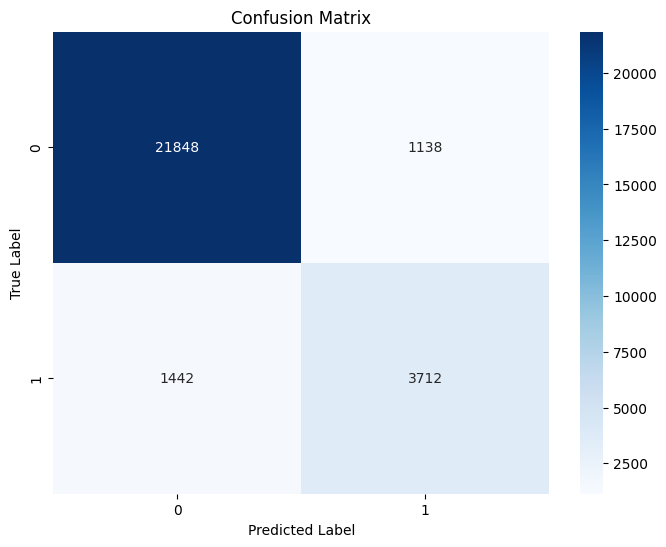

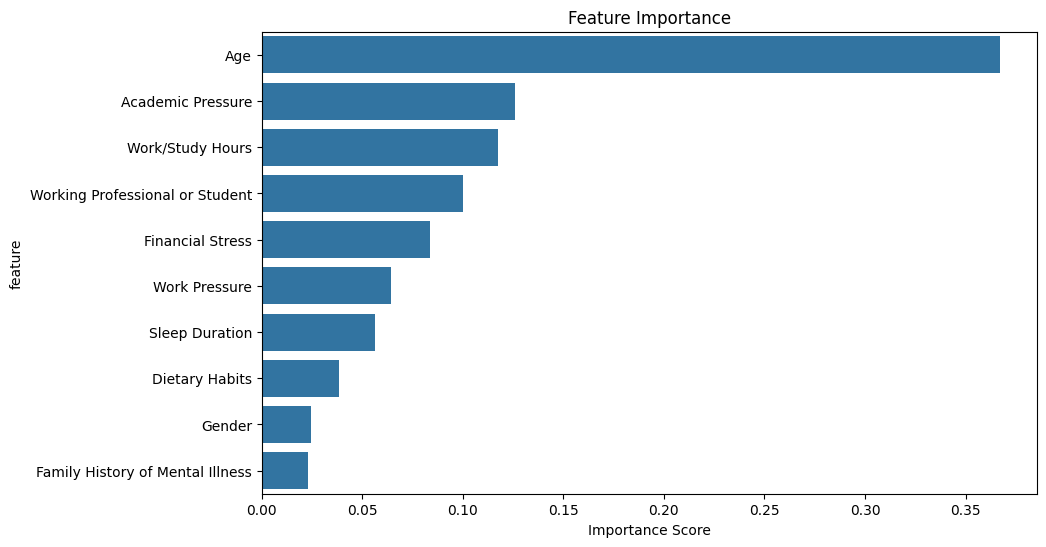

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('train.csv')

# Data preprocessing
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 
                      'Sleep Duration', 'Dietary Habits', 'Degree', 
                      'Have you ever had suicidal thoughts ?', 
                      'Family History of Mental Illness']

# Modified preprocessing section
for column in categorical_columns:
    # Handle missing values in categorical columns first
    df[column] = df[column].fillna('Unknown')
    # Clean the strings before encoding
    df[column] = df[column].astype(str).str.strip()
    df[column] = le.fit_transform(df[column])

# Handle missing values in numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


# Select features for the model
features = ['Gender', 'Age', 'Working Professional or Student', 'Academic Pressure',
           'Work Pressure', 'Sleep Duration', 'Dietary Habits', 'Work/Study Hours',
           'Financial Stress', 'Family History of Mental Illness']

X = df[features]
y = df['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print model evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()